In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv(r"/home/friday/Downloads/diabetes.csv")

In [4]:
scaler=StandardScaler()
scaler.fit(data)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

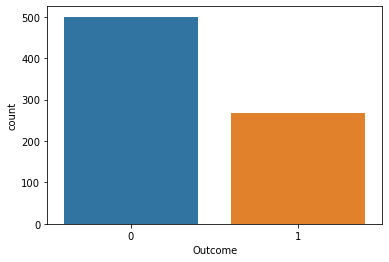

In [6]:
sns.countplot(x='Outcome',data=data)


In [7]:
columns=data.columns[:8]
length=len(columns)
print(columns)
print(length)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
8


# Correlations

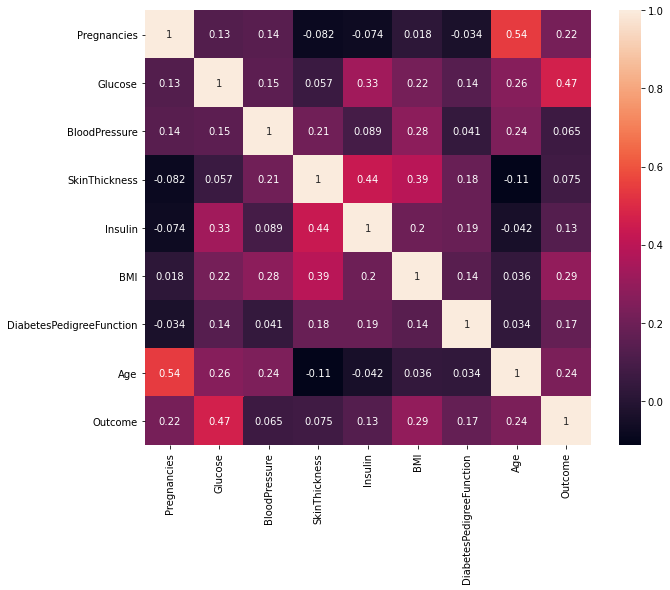

In [8]:
sns.heatmap(data.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# Data Division

In [23]:
y=data["Outcome"]
x=data.iloc[:,:8]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train,y_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
762            9       89             62              0        0  22.5   
127            1      118             58             36       94  33.3   
564            0       91             80              0        0  32.4   
375           12      140             82             43      325  39.2   
663            9      145             80             46      130  37.9   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
192            7      159             66              0        0  30.4   
629            4       94             65             22        0  24.7   
559           11       85             74              0        0  30.1   
684            5      136             82              0        0   0.0   

     DiabetesPedigreeFunction  Age  
762                     0.142   33  
127                     0.261   23  


# ML Modelling

In [10]:
#random forest 
rf = RandomForestClassifier(n_estimators=300,random_state=72)
model_rf = rf.fit(x_train,y_train)
pred_rf = model_rf.predict(x_test)
print(confusion_matrix(y_test,pred_rf))
print(accuracy_score(pred_rf,y_test))
print(f1_score(pred_rf,y_test))
print(classification_report(pred_rf,y_test))

[[115  15]
 [ 25  37]]
0.7916666666666666
0.6491228070175439
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       140
           1       0.60      0.71      0.65        52

    accuracy                           0.79       192
   macro avg       0.74      0.77      0.75       192
weighted avg       0.81      0.79      0.80       192



In [15]:
#logistic regression
model = LogisticRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(prediction,y_test))
print(f1_score(prediction,y_test))
print(classification_report(prediction,y_test))

[[115  15]
 [ 25  37]]
0.7916666666666666
0.6491228070175439
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       140
           1       0.60      0.71      0.65        52

    accuracy                           0.79       192
   macro avg       0.74      0.77      0.75       192
weighted avg       0.81      0.79      0.80       192



/home/friday/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,p=2)
model.fit(x_train,y_train)
prediction1=model.predict(x_test)
print(confusion_matrix(y_test,prediction1))
print(accuracy_score(prediction1,y_test))
print(f1_score(prediction1,y_test))
print(classification_report(prediction1,y_test))

[[109  21]
 [ 26  36]]
0.7552083333333334
0.6050420168067226
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       135
           1       0.58      0.63      0.61        57

    accuracy                           0.76       192
   macro avg       0.71      0.72      0.71       192
weighted avg       0.76      0.76      0.76       192



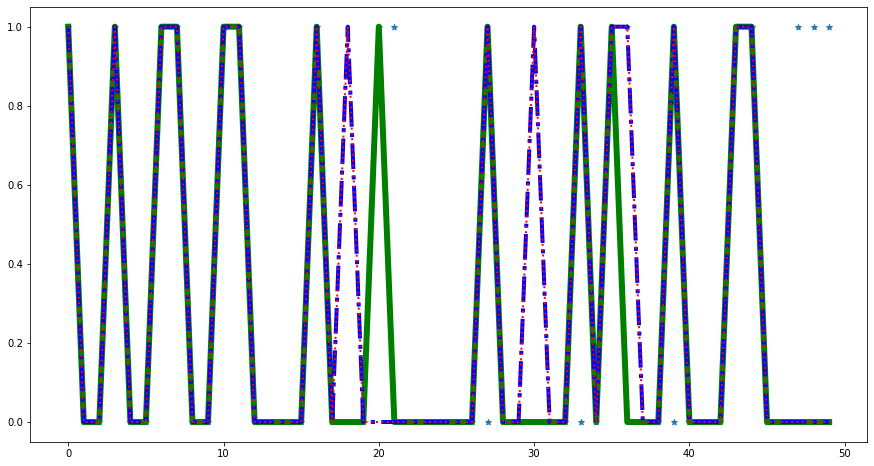

In [71]:
li=[]
leng=len(y_test)
for i in range(leng):
    li.append(i)
plt.figure(figsize=(15,8))
plt.scatter(li[:50],y_test[:50],marker='*')
plt.plot(li[:50],pred_rf[:50],'-',c='g',linewidth=6)
plt.plot(li[:50],prediction[:50],'-.',c='b',linewidth=4)
plt.plot(li[:50],prediction1[:50],':',c='r',linewidth=2)

plt.show()